In [2]:
#Importing Libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
#Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


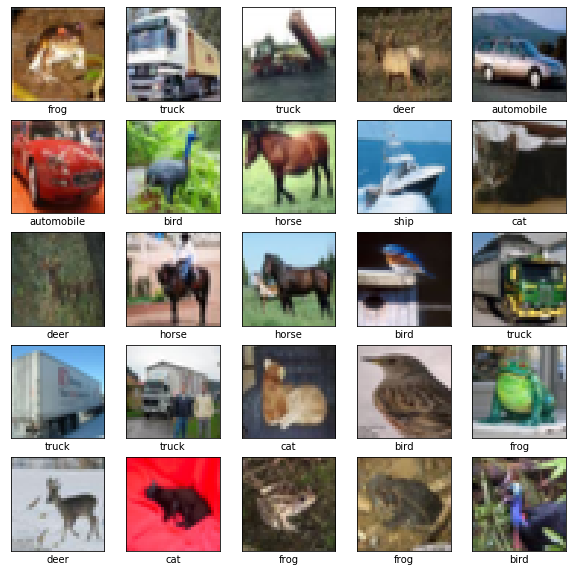

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#Verify the Data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
#Building the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Addding Dense Layer on Top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Compile and Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 130us/sample - loss: 1.5391 - acc: 0.4380 - val_loss: 1.2996 - val_acc: 0.5344
Epoch 2/10
50000/50000 [==============================] - 6s 127us/sample - loss: 1.1947 - acc: 0.5763 - val_loss: 1.1488 - val_acc: 0.5895
Epoch 3/10
50000/50000 [==============================] - 6s 128us/sample - loss: 1.0540 - acc: 0.6289 - val_loss: 1.0724 - val_acc: 0.6262
Epoch 4/10
50000/50000 [==============================] - 6s 128us/sample - loss: 0.9636 - acc: 0.6618 - val_loss: 1.0394 - val_acc: 0.6344
Epoch 5/10
50000/50000 [==============================] - 6s 128us/sample - loss: 0.8838 - acc: 0.6881 - val_loss: 0.9486 - val_acc: 0.6689
Epoch 6/10
50000/50000 [==============================] - 6s 129us/sample - loss: 0.8238 - acc: 0.7119 - val_loss: 0.8859 - val_acc: 0.6985
Epoch 7/10
50000/50000 [==============================] - 6s 127us/sample - loss: 0.7718 - acc: 0.7287 - val_l

In [11]:
est_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.8751 - acc: 0.7043

Test accuracy: 0.7043


In [13]:
#Make Predictions
prediction = model.predict(test_images)
print (test_labels[0].item())
print(class_names[np.argmax(prediction[0])])
test_images[0].shape

3
cat


(32, 32, 3)

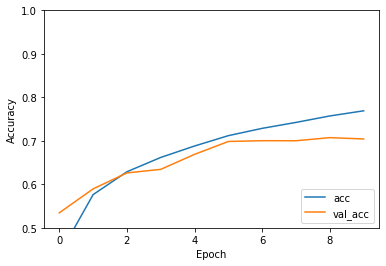

In [18]:
#Evaluating the Model
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

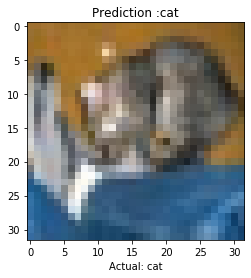

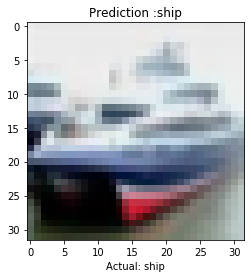

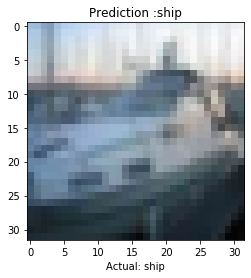

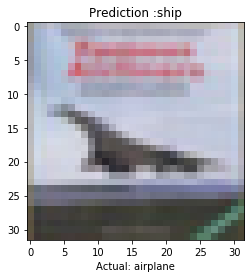

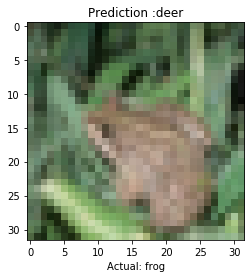

In [20]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel("Actual: " + class_names[test_labels[i].item()])
  plt.title("Prediction :" + class_names[np.argmax(prediction[i])])
  plt.show()